<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🌟 Importing Essential Libraries
    </h2>
</div>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import joblib as jb
import warnings, os

warnings.filterwarnings('ignore')
plt.style.use('dark_background')
sns.set_context('notebook')
sns.set_palette('deep')
sns.set_color_codes()
pd.set_option('display.max_columns', None)

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📂 Loading Dataset
    </h2>
</div>


In [4]:
dataset_path = os.path.join("..", "Data")
train_data = pd.read_csv(f"{dataset_path}/train.csv", index_col='id')
test_data = pd.read_csv(f'{dataset_path}/test.csv', index_col='id')

# train_data = pd.read_csv(f"train.csv", index_col='id')
# test_data = pd.read_csv(f'test.csv', index_col='id')

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔍 Data Exploration
    </h2>
</div>

In [5]:
train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
train_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [7]:
train_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [9]:
train_data.shape

(58645, 12)

In [10]:
train_data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔄 Counting Duplicated Rows
    </h2>
</div>

In [11]:
train_data[train_data.duplicated()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Summary Statistics with Gradient
    </h2>
</div>

In [12]:
train_data.describe().T.style.background_gradient(cmap='viridis', axis=1)

,count,mean,std,min,25%,50%,75%,max
person_age,58645.000000,27.550857,6.033216,20.000000,23.000000,26.000000,30.000000,123.000000
person_income,58645.000000,64046.172871,37931.106979,4200.000000,42000.000000,58000.000000,75600.000000,1900000.000000
person_emp_length,58645.000000,4.701015,3.959784,0.000000,2.000000,4.000000,7.000000,123.000000
loan_amnt,58645.000000,9217.556518,5563.807384,500.000000,5000.000000,8000.000000,12000.000000,35000.000000
loan_int_rate,58645.000000,10.677874,3.034697,5.420000,7.880000,10.750000,12.990000,23.220000
loan_percent_income,58645.000000,0.159238,0.091692,0.000000,0.090000,0.140000,0.210000,0.830000
cb_person_cred_hist_length,58645.000000,5.813556,4.029196,2.000000,3.000000,4.000000,8.000000,30.000000
loan_status,58645.000000,0.142382,0.349445,0.000000,0.000000,0.000000,0.000000,1.000000


In [13]:
train_data.apply(lambda x: x.nunique())

person_age                      53
person_income                 2641
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      545
loan_int_rate                  362
loan_percent_income             61
cb_person_default_on_file        2
cb_person_cred_hist_length      29
loan_status                      2
dtype: int64

In [14]:
unique = train_data.nunique().sort_values(ascending=False)
nunique_value = train_data.apply(lambda x: x.unique())
result = pd.DataFrame({'Number of Unique Values': unique, 'Unique Value': nunique_value})
result

,Number of Unique Values,Unique Value
cb_person_cred_hist_length,29,"[14, 2, 10, 5, 3, 11, 6, 9, 7, 8, 4, 17, 13, 1..."
cb_person_default_on_file,2,"[N, Y]"
loan_amnt,545,"[6000, 4000, 12000, 9000, 2500, 5000, 15000, 1..."
loan_grade,7,"[B, C, A, D, E, F, G]"
loan_int_rate,362,"[11.49, 13.35, 8.9, 11.11, 6.92, 8.94, 6.54, 1..."
loan_intent,6,"[EDUCATION, MEDICAL, PERSONAL, VENTURE, DEBTCO..."
loan_percent_income,61,"[0.17, 0.07, 0.21, 0.1, 0.2, 0.27, 0.13, 0.14,..."
loan_status,2,"[0, 1]"
person_age,53,"[37, 22, 29, 30, 27, 25, 21, 35, 31, 26, 28, 3..."
person_emp_length,36,"[0.0, 6.0, 8.0, 14.0, 2.0, 9.0, 11.0, 5.0, 1.0..."


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Exploratory Data Analysis
    </h2>
</div>

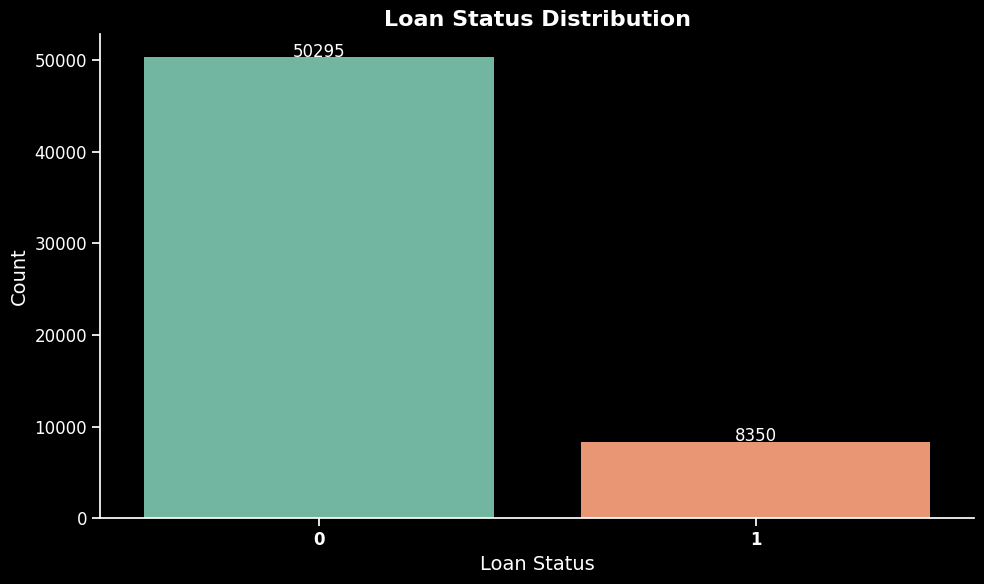

In [15]:
loan_stat = train_data['loan_status'].value_counts()

plt.figure(figsize=(10, 6))

sns.barplot(x=loan_stat.index, y=loan_stat.values, palette='Set2')

plt.title('Loan Status Distribution', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12)

for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50,
        f'{int(bar.get_height())}',
        ha='center', fontsize=12
    )

sns.despine()

# plt.savefig(os.path.join("..", "Charts", "Loan Status Distribution.png"))

plt.tight_layout()

plt.show()

### Image Analysis and Insights:

1. Average Loan Amount by Loan Status
<p>
The bar chart titled "Average Loan Amount by Loan Status" presents the average loan amount for two different loan statuses, represented by the numbers 0 and 1.
</p>

- Loan Status 0: The average loan amount for this status is approximately 8888.88.
- Loan Status 1: The average loan amount for this status is significantly higher, at around 11197.27.

### Key Insights:

- Loan Status 1 has a higher average loan amount than Loan Status 0. This suggests that Loan Status 1 might represent loans with larger amounts, potentially indicating different types of loans (e.g., home loans, auto loans, personal loans).
- The difference in average loan amounts between the two statuses is substantial. This could be due to various factors, such as loan purpose, borrower creditworthiness, or loan term.

#### Further Analysis and Questions:
<p>
To gain a deeper understanding of the data, it would be helpful to have additional information, such as:
</p>

- Meaning of Loan Status 0 and 1: Understanding the criteria used to categorize loans into these statuses would provide valuable context.
- Distribution of Loan Amounts: Analyzing the distribution of loan amounts within each status would reveal if there are outliers or specific patterns.
- Loan Default Rates: Comparing the default rates for loans in each status could help assess the risk associated with different loan types.
- Time Period: Knowing the time frame covered by the data would help determine if there are any trends or changes in average loan amounts over time.

By addressing these questions and incorporating additional data points, we can develop more comprehensive insights into the loan data and its implications.

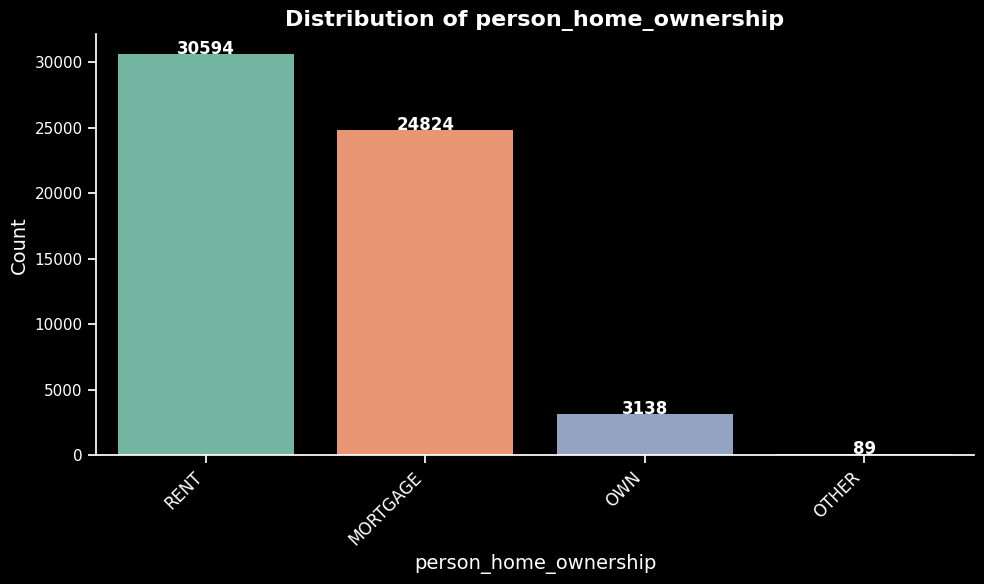

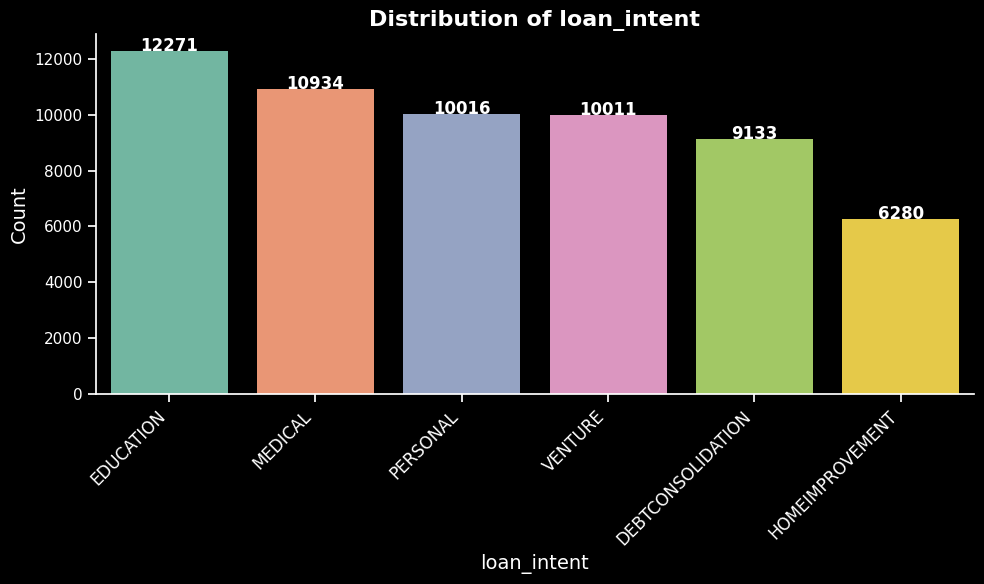

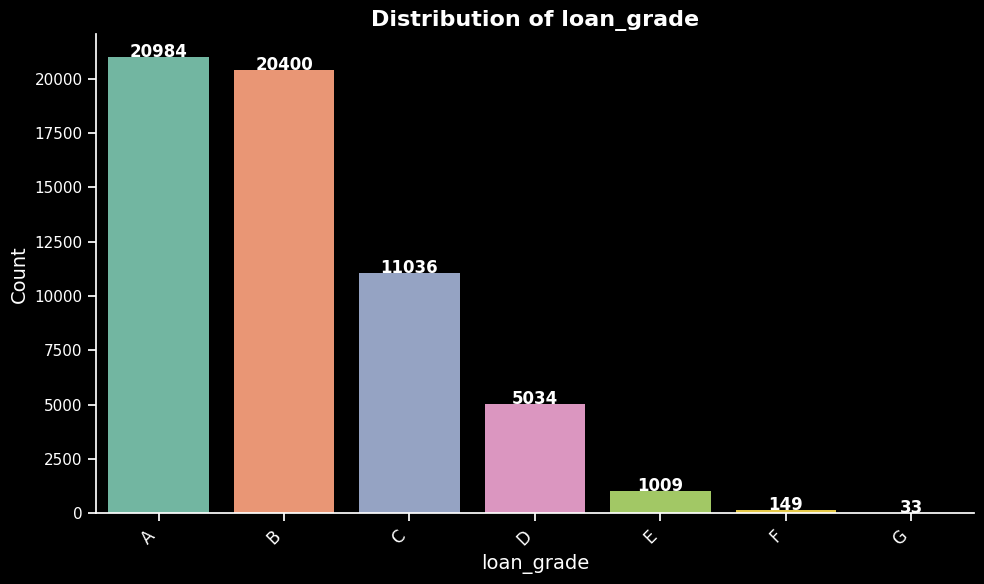

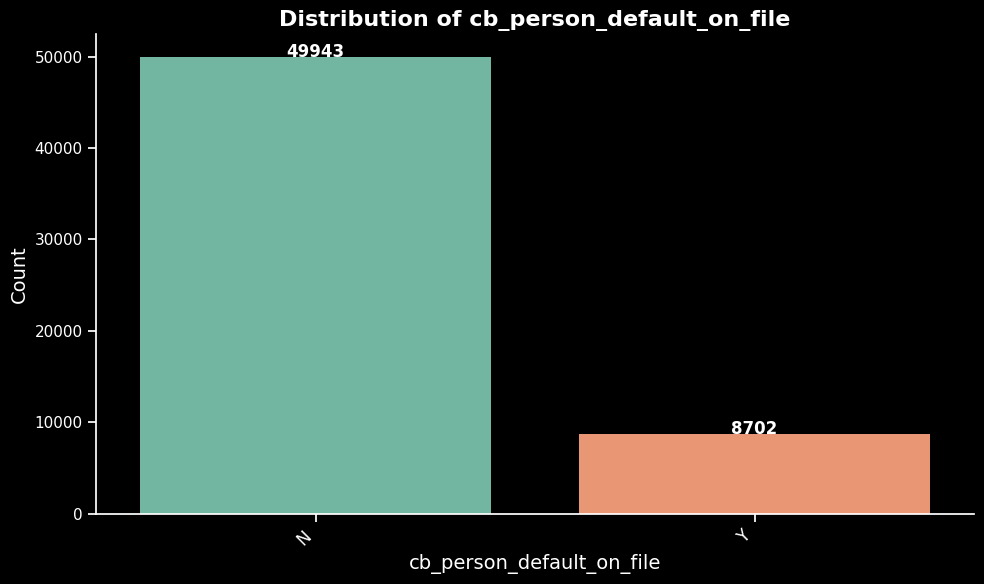

In [16]:
cat_columns = train_data.select_dtypes(include='object').columns

for cat_col in cat_columns:
    value_counts = train_data[cat_col].value_counts().reset_index()
    value_counts.columns = [cat_col, 'Count']

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=value_counts, x=cat_col, y='Count', palette='Set2')

    for i, bar in enumerate(ax.patches):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,
            f'{int(bar.get_height())}',
            ha='center', fontsize=12, weight='bold'
        )

    plt.title(f'Distribution of {cat_col}', fontsize=16, weight='bold')
    plt.xlabel(cat_col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    sns.despine()
    plt.tight_layout()
    # plt.savefig(os.path.join("..", "Charts", f"Distribution of {cat_col}.png"))
    plt.show()

## **Key Insights from the Person Home Ownership Chart:**

1. Renting is the most common home ownership status: A significant portion of individuals in the dataset are renters.
2. Homeownership with a mortgage is also prevalent: Many individuals are investing in homeownership but are financing it through mortgages.
3. Owning homes outright is less common: Fewer individuals own their homes outright without any mortgage.
4. The "Other" category is negligible: This category represents a very small proportion of the dataset.

## **Additional Insights:**

- Financial Constraints and Preferences: The high proportion of renters suggests that financial constraints or preferences for renting may be influencing home ownership decisions.
- Impact of Economic Factors: Economic factors such as interest rates and housing prices can significantly impact homeownership trends. Analyzing the data in conjunction with these factors can provide valuable insights.

<b>To gain a deeper understanding, it would be beneficial to explore additional factors like:</b>

- Demographic information: Age, income, and other demographic characteristics can provide valuable insights into homeownership patterns.
- Geographic location: Analyzing regional variations can help identify specific trends and factors influencing homeownership.
- Time period: Understanding the time frame covered by the data can reveal trends and changes in homeownership patterns over time.

## **Key Insights from the "Loan Intent Distribution" Chart**

1. **Education and Medical Loans are Most Popular:** Education and Medical loans have the highest demand, with counts significantly above other loan intents.

2. **Personal and Venture Loans Have Similar Demand:** These two categories have comparable demand, suggesting a balanced interest in personal finance and business ventures.

3. **Debt Consolidation and Home Improvement Loans are Less Popular:** These loan intents have the lowest demand compared to others, indicating a lower priority for these financial needs.

## **Additional Insights:**

- **Understanding the Target Audience:** The high demand for Education and Medical loans suggests a potential focus on individuals seeking financial assistance for these specific needs.
- **Balancing Loan Portfolio:** While there is a strong demand for Education and Medical loans, considering a diversified loan portfolio by catering to other intents like Personal, Venture, Debt Consolidation, and Home Improvement could be beneficial.
- **Identifying Niche Markets:** The lower demand for Debt Consolidation and Home Improvement loans could indicate opportunities for targeted marketing campaigns or specialized loan products to attract more customers in these segments.

**To gain a deeper understanding, it would be beneficial to explore additional factors like:**

- **Demographic Information:** Analyzing the age, income, and other demographic characteristics of loan applicants for different intents can provide valuable insights.
- **Economic Factors:** Understanding the economic conditions and trends can help explain fluctuations in loan demand for different intents.
- **Competitive Landscape:** Analyzing the offerings of other financial institutions can help identify opportunities for differentiation and competitive advantage.

## **Key Insights from the "Distribution of loan_grade" Chart:**

* **Most loans are in grades A and B:** Grades A and B have the highest number of loans, indicating a significant portion of borrowers with good creditworthiness.
* **Lower grades have significantly fewer loans:** As the loan grade decreases (from C to G), the number of loans also decreases significantly, suggesting a smaller proportion of borrowers with lower creditworthiness.
* **Grade A has the highest number of loans:** Among all grades, Grade A has the highest number of loans, indicating a preference for low-risk borrowers.

**Additional Insights:**

* **Lender's Risk Profile:** The distribution of loan grades can provide insights into the lender's risk profile. A higher concentration of loans in lower grades might indicate a higher risk tolerance.
* **Creditworthiness of Borrowers:** The data suggests that a significant proportion of borrowers have good creditworthiness, which is beneficial for lenders.
* **Potential for Targeted Marketing:** Lenders can use this information to identify potential target segments for different loan products, such as offering specialized products for borrowers with lower creditworthiness.

**To gain a deeper understanding, it would be beneficial to explore additional factors like:**

* **Economic Factors:** Analyzing the distribution of loan grades during different economic cycles can reveal how economic conditions influence borrower creditworthiness.
* **Loan Purpose:** Understanding the distribution of loan grades for different loan purposes can provide insights into the risk associated with various loan types.
* **Loan Default Rates:** Analyzing the default rates for different loan grades can help assess the credit risk associated with each grade.

## **Key Insights from the "Distribution of cb_person_default_on_file" Chart:**

* **Most borrowers have no default on file:** The majority of borrowers (49,943) have no history of default on their credit file.
* **A smaller portion has a default on file:** Only 8,702 borrowers have a default on their credit file, indicating a relatively low proportion of borrowers with a history of default.

**Additional Insights:**

* **Creditworthiness of Borrowers:** The data suggests that the majority of borrowers have a good credit history, which is positive for lenders.
* **Risk Assessment:** Lenders can use this information to assess the creditworthiness of borrowers and make informed lending decisions.
* **Potential for Targeted Marketing:** Lenders can offer specialized products or services to borrowers with a history of default to help them improve their creditworthiness.

**To gain a deeper understanding, it would be beneficial to explore additional factors like:**

* **Loan Purpose:** Analyzing the distribution of defaults for different loan purposes can help identify areas with higher default rates.
* **Loan Amount and Term:** Understanding the relationship between loan amount, loan term, and default rates can provide valuable insights.
* **Economic Factors:** Analyzing the distribution of defaults during different economic cycles can reveal how economic conditions influence default rates.

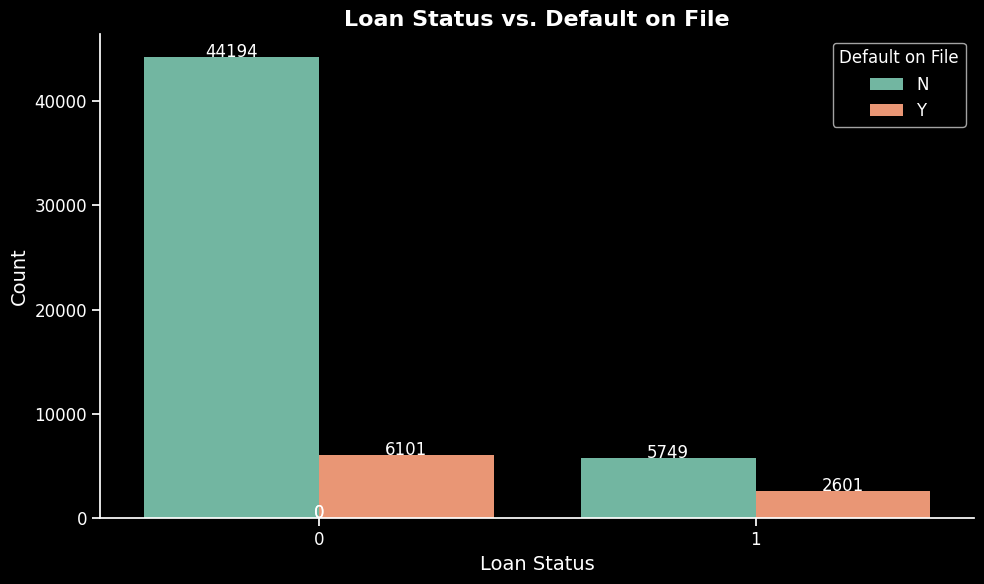

In [17]:
loan_def = train_data.groupby('loan_status')['cb_person_default_on_file'].value_counts().reset_index(name='Count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=loan_def,
    x='loan_status',
    y='Count',
    hue='cb_person_default_on_file',
    palette='Set2'
)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f'{int(bar.get_height())}',
        ha='center', fontsize=12
    )

# Customizing the plot
plt.title('Loan Status vs. Default on File', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Default on File', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
# plt.savefig(os.path.join("..", "Charts", "Loan Status vs. Default on File.png"))
plt.show()


## **Key Insights from the "Loan Status vs. Default on File" Chart:**

* **Default on File is Concentrated in Loan Status 0:** The majority of defaults occur in loans with a status of 0. This suggests that loans with a status of 0 may be more prone to default.
* **Loan Status 1 Has Fewer Defaults:** The number of defaults is significantly lower for loans with a status of 1, indicating a lower risk profile for these loans.

**Additional Insights:**

* **Understanding Loan Status:** To fully interpret these results, it's crucial to understand what the different loan statuses (0 and 1) represent. Knowing the specific criteria used to categorize loans into these statuses would provide valuable context.
* **Risk Assessment:** Lenders can use this information to assess the risk associated with different loan statuses and adjust their lending strategies accordingly.
* **Targeted Interventions:** Identifying the factors contributing to defaults in loans with a status of 0 could help implement targeted interventions to reduce default rates.

**To gain a deeper understanding, it would be beneficial to explore additional factors like:**

* **Loan Characteristics:** Analyzing the distribution of defaults based on loan amount, term, interest rate, and other relevant factors can provide further insights.
* **Borrower Demographics:** Understanding the demographic characteristics of borrowers who default on loans with a status of 0 can help identify specific risk groups.
* **Economic Factors:** Analyzing the distribution of defaults during different economic cycles can reveal how economic conditions influence default rates.

By delving deeper into these factors, lenders can develop more effective strategies to mitigate credit risk and improve their overall portfolio performance.

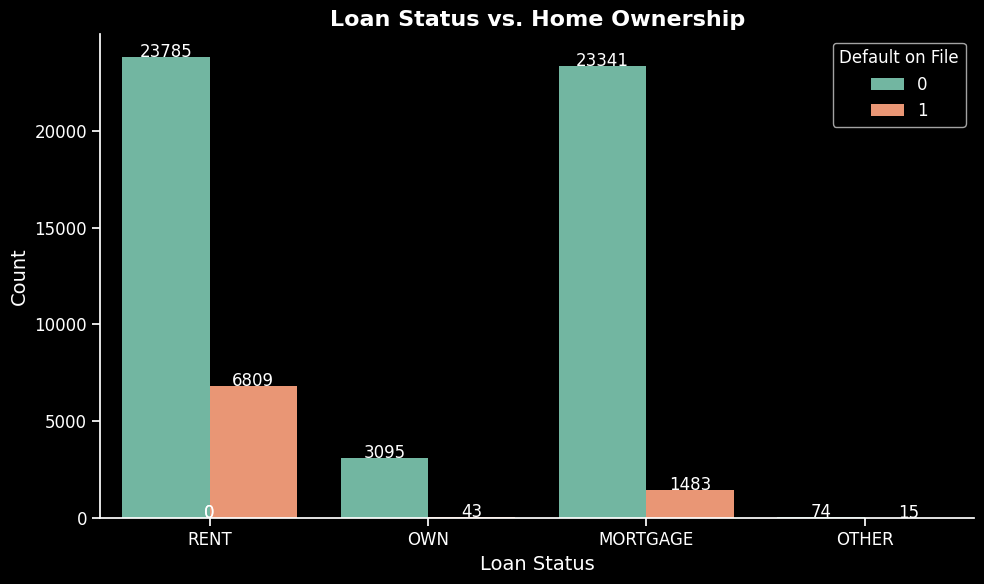

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='person_home_ownership',
    hue='loan_status',
    data=train_data,
    palette="Set2")

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.5,
        f'{int(bar.get_height())}',
        ha='center', fontsize=12
    )

plt.title('Loan Status vs. Home Ownership', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Default on File', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
# plt.savefig(os.path.join("..", "Charts", "Loan Status vs. Home Ownership.png"))
plt.show()


## **Key Insights from the "Loan Status vs. Home Ownership" Chart:**

* **Renting is the Most Common Home Ownership Status:** A significant majority of borrowers in both loan statuses (0 and 1) are renters. This indicates that renting is a prevalent housing arrangement among the loan applicant population.
* **Homeownership with a Mortgage is the Second Most Common:** Mortgaged homes are the second most common housing type among borrowers. This suggests that many borrowers are investing in homeownership but are financing it through mortgages.
* **Owning Homes Outright is Less Common:** A smaller proportion of borrowers own their homes outright without any mortgage. This could be due to various factors, such as financial constraints or preferences for renting or mortgaging.
* **The "Other" Category is Negligible:** The "Other" category represents a very small proportion of the dataset, indicating that most borrowers fall into one of the three main categories: renting, owning with a mortgage, or owning outright.

**Additional Insights:**

* **Home Ownership and Default Risk:** The chart suggests that homeownership status might not be a strong predictor of default risk. Both renters and homeowners with mortgages have a significant number of defaults.
* **Financial Constraints and Preferences:** The high proportion of renters suggests that financial constraints or preferences for renting may be influencing home ownership decisions among borrowers.
* **Impact of Economic Factors:** Economic factors such as interest rates and housing prices can significantly impact homeownership trends and, consequently, the default rates of borrowers.

**To gain a deeper understanding, it would be beneficial to explore additional factors like:**

* **Demographic Information:** Analyzing the age, income, and other demographic characteristics of borrowers in different home ownership categories can provide valuable insights into their financial behavior and risk profiles.
* **Loan Characteristics:** Understanding how loan amount, term, and interest rate vary across different home ownership groups can help identify potential risk factors.
* **Geographic Location:** Analyzing the distribution of home ownership and default rates across different geographic regions can reveal regional variations and underlying factors.

By delving deeper into these factors, lenders can develop more effective underwriting and risk management strategies to mitigate credit risk and improve their overall portfolio performance.

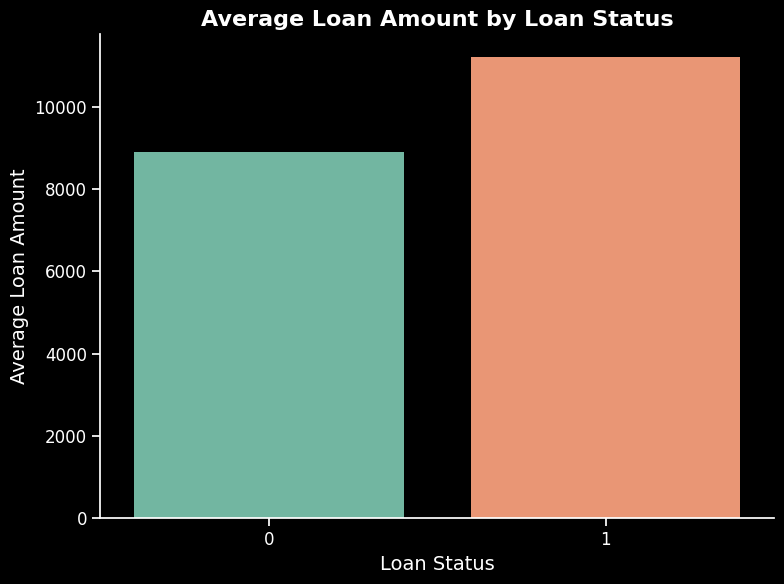

In [19]:
mean_loan_amount_per_status = train_data.groupby('loan_status')['loan_amnt'].mean()

plt.figure(figsize=(8, 6))

ax = sns.barplot(
    x=mean_loan_amount_per_status.index,
    y=mean_loan_amount_per_status.values,
    palette='Set2'
)

for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 50,
        f'{bar.get_height():.2f}',
        ha='center', fontsize=12, color='black'
    )

plt.title('Average Loan Amount by Loan Status', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Average Loan Amount', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

plt.tight_layout()
# plt.savefig(os.path.join("..", "Charts", "Average Loan Amount by Loan Status.png"))
plt.show()

## **Key Insights from the "Average Loan Amount by Loan Status" Chart:**

* **Loan Status 1 has a higher average loan amount than Loan Status 0:** This suggests that Loan Status 1 might represent loans with larger amounts, potentially indicating different types of loans (e.g., home loans, auto loans, personal loans).
* **The difference in average loan amounts between the two statuses is substantial:** This could be due to various factors, such as loan purpose, borrower creditworthiness, or loan term.

**Additional Insights:**

* **Understanding Loan Status:** To fully interpret these results, it's crucial to understand what the different loan statuses (0 and 1) represent. Knowing the specific criteria used to categorize loans into these statuses would provide valuable context.
* **Risk Assessment:** Lenders can use this information to assess the risk associated with different loan statuses and adjust their lending strategies accordingly.
* **Targeted Marketing:** Identifying the factors contributing to the higher average loan amounts in Loan Status 1 could help lenders tailor their marketing efforts to attract borrowers with higher borrowing needs.

**To gain a deeper understanding, it would be beneficial to explore additional factors like:**

* **Loan Purpose:** Analyzing the distribution of loan amounts for different loan purposes can help identify specific categories with higher average loan values.
* **Borrower Demographics:** Understanding the demographic characteristics of borrowers with higher loan amounts can help identify target segments for specific loan products.
* **Economic Factors:** Analyzing the trend of average loan amounts over time can reveal how economic conditions influence borrowing behavior.

By delving deeper into these factors, lenders can develop more effective underwriting and risk management strategies to optimize their loan portfolio and cater to the diverse needs of borrowers.

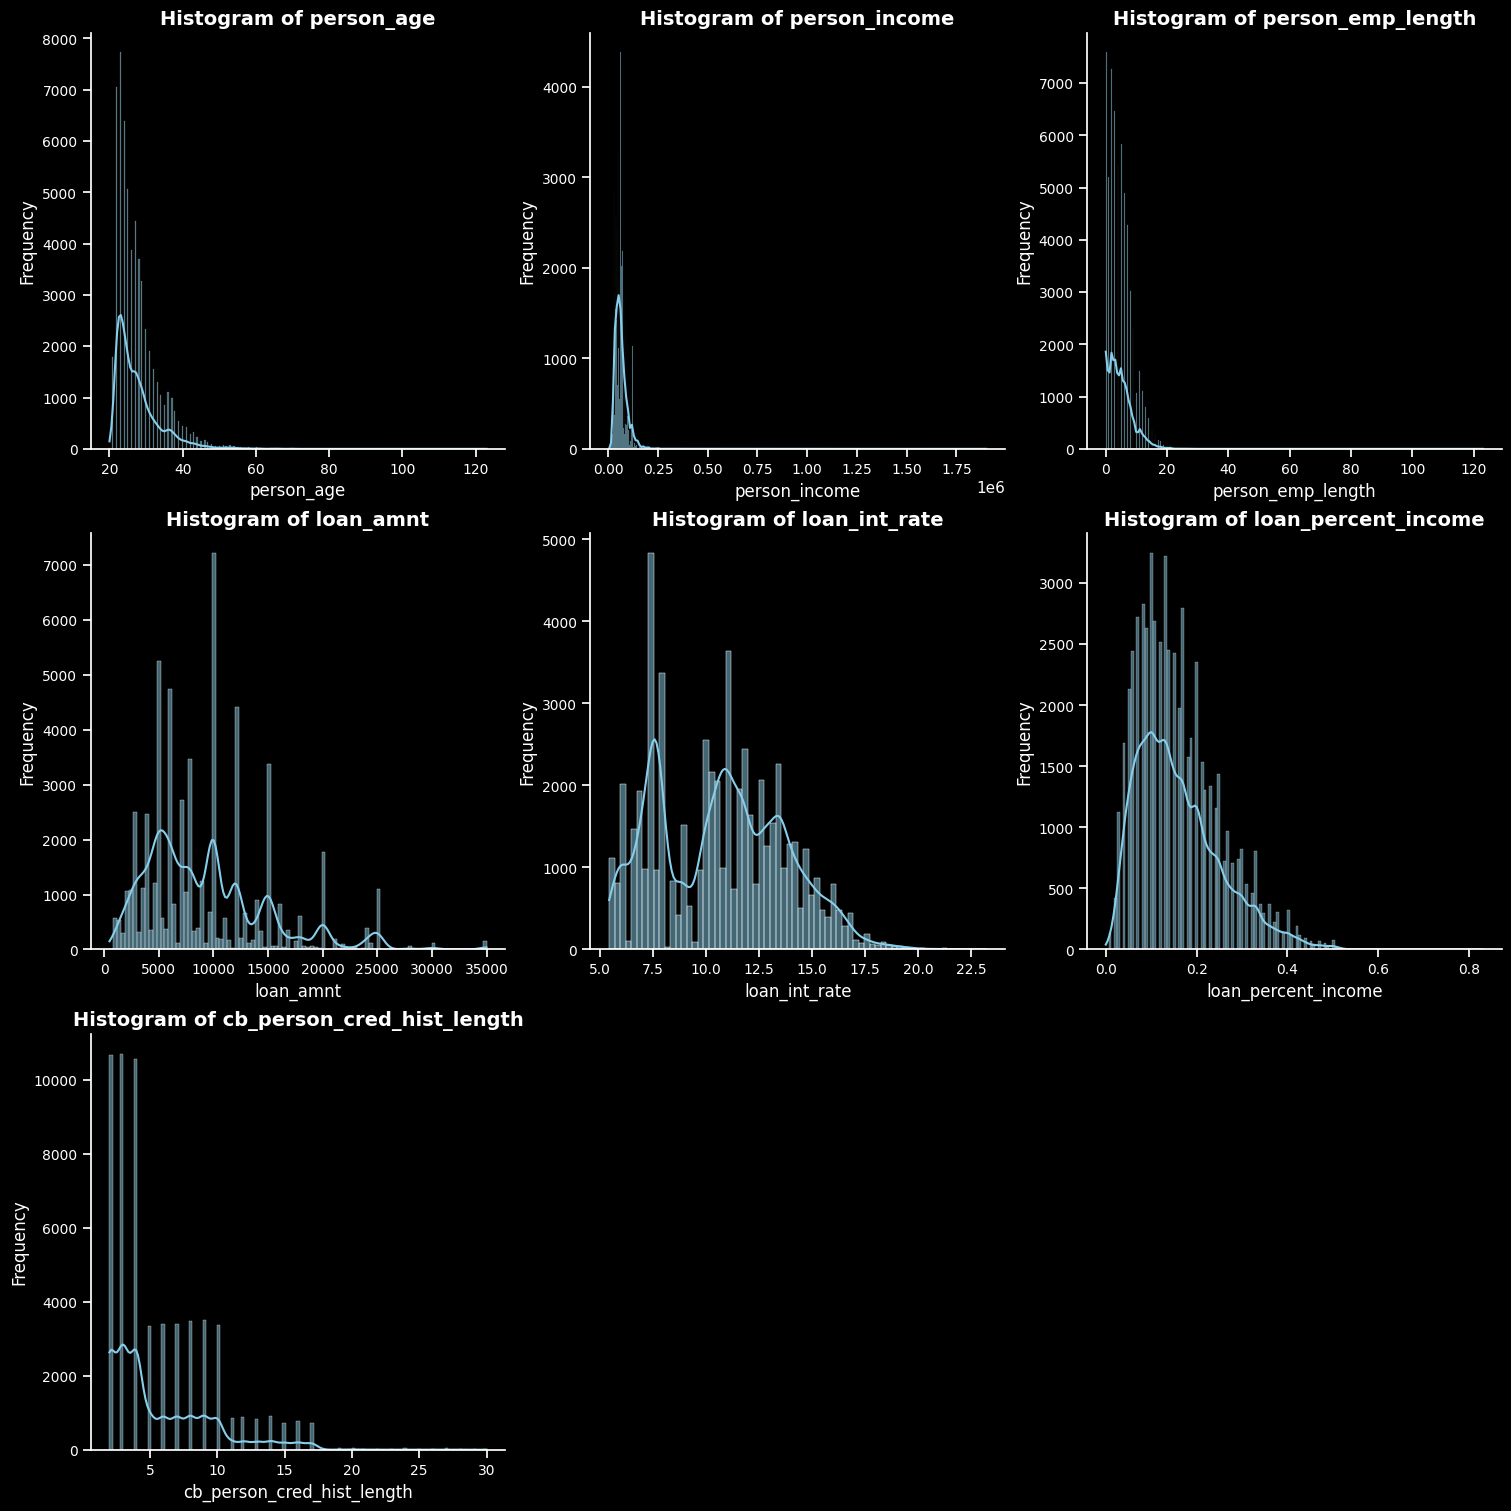

In [20]:
num_cols = train_data.select_dtypes(exclude='object').columns[:-1]

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.histplot(data=train_data, x=col, color='skyblue', kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histogram of {col}', fontsize=14, weight='bold')
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel('Frequency', fontsize=12)
    axes[idx].tick_params(axis='both', labelsize=10)
    sns.despine(ax=axes[idx])

for ax in axes[len(num_cols):]:
    ax.axis('off')
# plt.savefig(os.path.join("..", "Charts", "Histograms.png"))
plt.show()

## **Key Insights from the Histograms**

**1. Borrower Demographics:**

* **Age:** Most borrowers are concentrated in the 20-30 age group, suggesting a focus on younger individuals.
* **Income:** The distribution of income is right-skewed, indicating a larger number of borrowers with lower incomes.
* **Employment Length:** The distribution is right-skewed, suggesting that a significant portion of borrowers have shorter employment histories.

**2. Loan Characteristics:**

* **Loan Amount:** The distribution is right-skewed, with a larger number of smaller loans.
* **Interest Rate:** The distribution is right-skewed, indicating a higher proportion of lower interest rate loans.
* **Loan-to-Income Ratio:** The distribution is right-skewed, with a larger number of loans with lower loan-to-income ratios.

**3. Borrower Credit History:**

* **Credit History Length:** The distribution is right-skewed, suggesting that a significant portion of borrowers have shorter credit histories.

**Additional Insights:**

* **Understanding the Target Market:** The analysis suggests that the lender may be targeting younger individuals with lower incomes and shorter employment histories.
* **Risk Assessment:** The distribution of loan amounts and interest rates can provide insights into the lender's risk appetite.
* **Product Strategy:** The analysis can help the lender tailor their product offerings to meet the specific needs of their target market.

**To gain a deeper understanding, it would be beneficial to explore additional factors like:**

* **Geographic Location:** Analyzing the distribution of borrower demographics and loan characteristics across different geographic regions can reveal regional variations.
* **Economic Factors:** Understanding the impact of economic conditions on borrower behavior and loan performance can help identify potential risks and opportunities.
* **Loan Performance:** Analyzing the default rates and repayment behavior of borrowers with different characteristics can help refine underwriting and risk management strategies.

By delving deeper into these factors, lenders can develop more effective strategies to attract and retain customers, manage credit risk, and improve overall profitability.

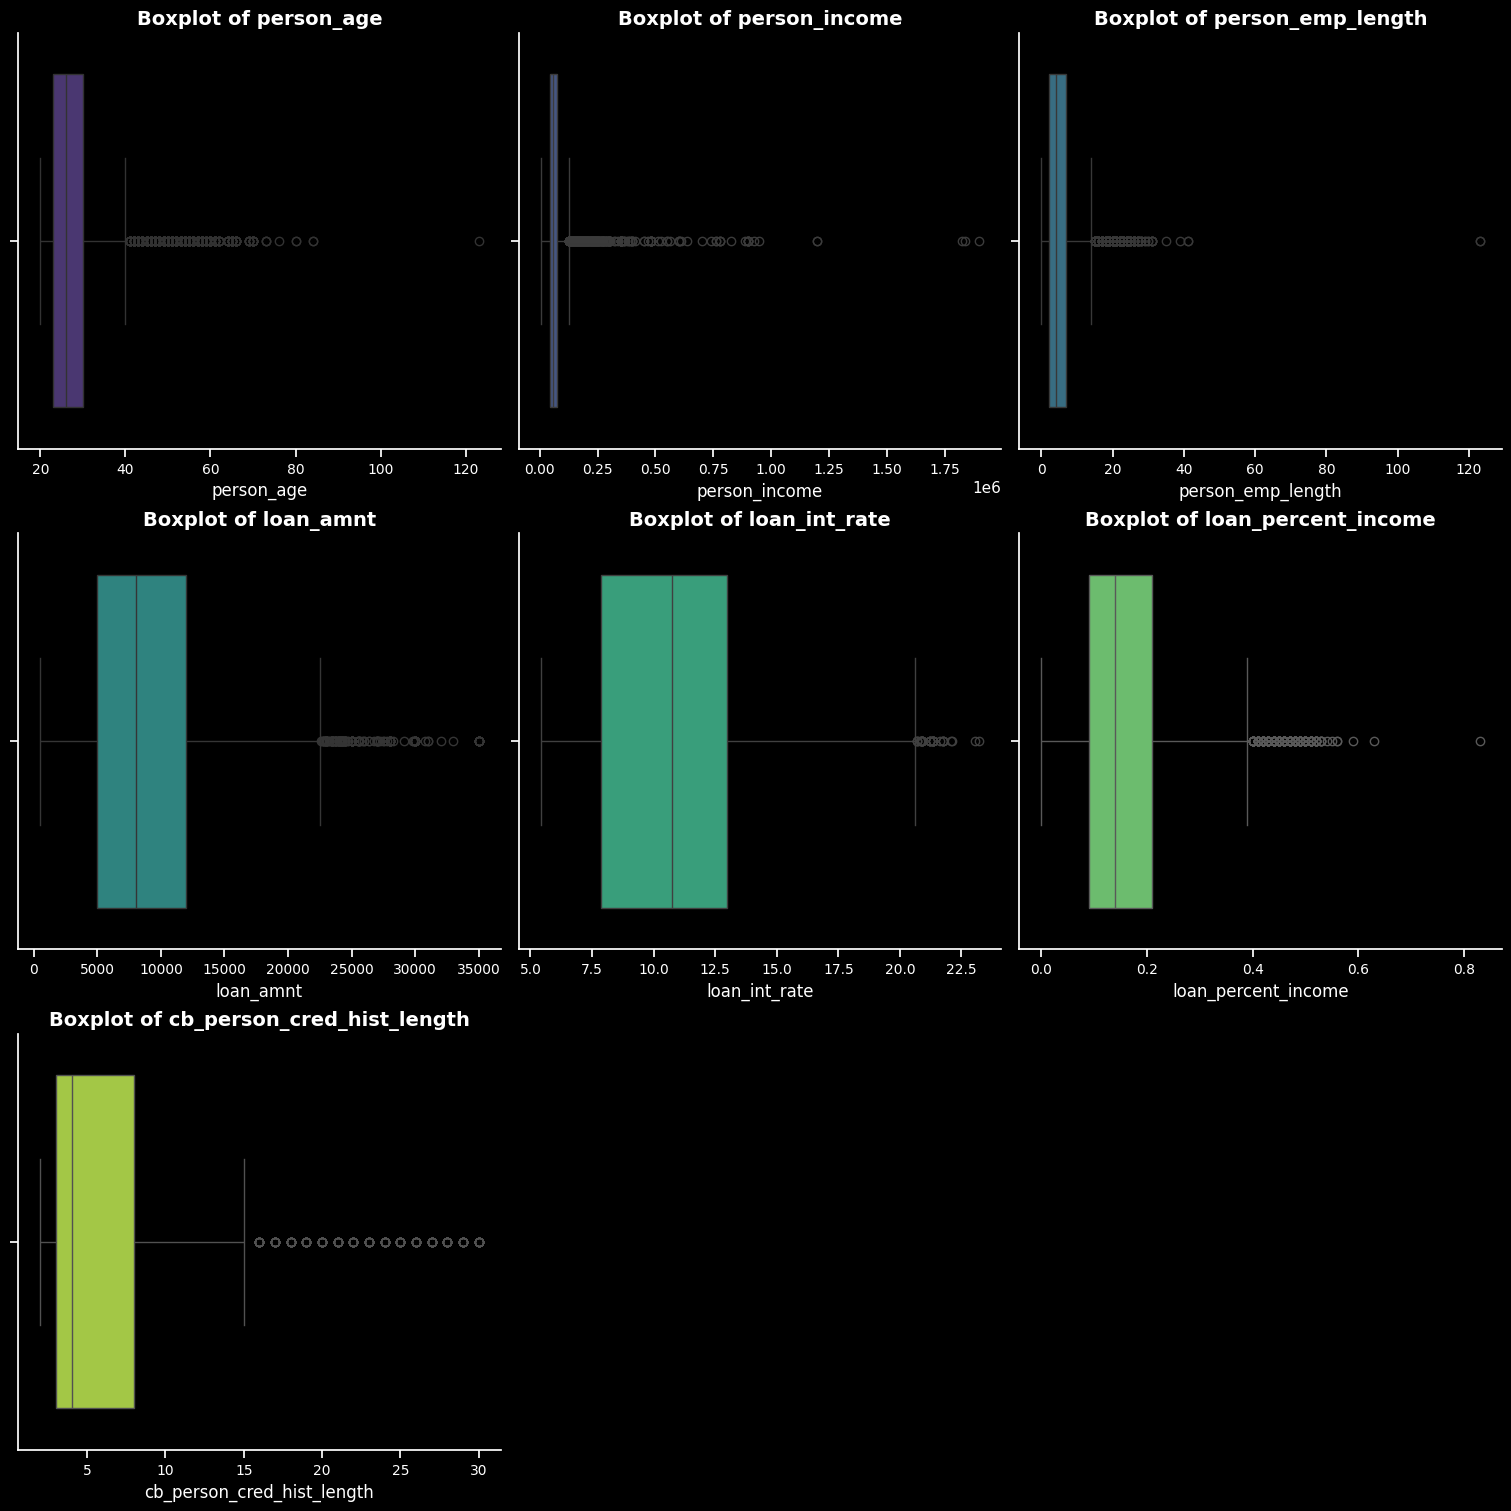

In [21]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

palette = sns.color_palette("viridis", len(num_cols))

axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=train_data, x=col, color=palette[idx], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}', fontsize=14, weight='bold')
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].tick_params(axis='both', labelsize=10)
    sns.despine(ax=axes[idx])

for ax in axes[len(num_cols):]:
    ax.axis('off')
# plt.savefig(os.path.join("..", "Charts", "Boxplots.png"))
plt.show()

## **Key Insights from the Boxplots**

**1. Borrower Demographics**

* **Age:** Most borrowers are concentrated in the 20-40 age group, with some outliers reaching up to 100 years old.
* **Income:** The distribution of income is highly right-skewed, with a large number of lower-income borrowers and a few high-income outliers.
* **Employment Length:** The distribution is right-skewed, suggesting that a significant portion of borrowers have shorter employment histories.

**2. Loan Characteristics**

* **Loan Amount:** The distribution is right-skewed, with a larger number of smaller loans and a few larger loans.
* **Interest Rate:** The distribution is relatively concentrated, with most loans falling within a specific interest rate range.
* **Loan-to-Income Ratio:** The distribution is right-skewed, with a larger number of loans with lower loan-to-income ratios.

**3. Borrower Credit History**

* **Credit History Length:** The distribution is right-skewed, suggesting that a significant portion of borrowers have shorter credit histories.

**Additional Insights:**

* **Understanding the Target Market:** The analysis suggests that the lender may be targeting younger individuals with lower incomes and shorter employment histories.
* **Risk Assessment:** The distribution of loan amounts and interest rates can provide insights into the lender's risk appetite.
* **Product Strategy:** The analysis can help the lender tailor their product offerings to meet the specific needs of their target market.

**To gain a deeper understanding, it would be beneficial to explore additional factors like:**

* **Geographic Location:** Analyzing the distribution of borrower demographics and loan characteristics across different geographic regions can reveal regional variations.
* **Economic Factors:** Understanding the impact of economic conditions on borrower behavior and loan performance can help identify potential risks and opportunities.
* **Loan Performance:** Analyzing the default rates and repayment behavior of borrowers with different characteristics can help refine underwriting and risk management strategies.

By delving deeper into these factors, lenders can develop more effective strategies to attract and retain customers, manage credit risk, and improve overall profitability.

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧹 Data Preprocessing 🧑‍💻
    </h2>
</div>

In [22]:
train_data.shape

(58645, 12)

In [23]:
train_data[train_data[num_cols] < 0].isna().sum()

person_age                    58645
person_income                 58645
person_home_ownership         58645
person_emp_length             58645
loan_intent                   58645
loan_grade                    58645
loan_amnt                     58645
loan_int_rate                 58645
loan_percent_income           58645
cb_person_default_on_file     58645
cb_person_cred_hist_length    58645
loan_status                   58645
dtype: int64

In [24]:
train_data['cb_person_default_on_file'] = train_data['cb_person_default_on_file'].map({
    'Y': 1,
    'N': 0
}).astype(int)

In [25]:
test_data['cb_person_default_on_file'] = test_data['cb_person_default_on_file'].map({
    'Y': 1,
    'N': 0
}).astype(int)

In [26]:
test_data['loan_grade'] = test_data['loan_grade'].map({
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5,
    "G" : 6
})

In [27]:
train_data['loan_grade'] = train_data['loan_grade'].map({
    "A" : 0,
    "B" : 1,
    "C" : 2,
    "D" : 3,
    "E" : 4,
    "F" : 5,
    "G" : 6
})

In [28]:
train_data_1 = pd.get_dummies(train_data, drop_first=True).astype(float)

In [29]:
test_data_1 = pd.get_dummies(test_data, drop_first=True).astype(float)

In [30]:
num_cols = train_data_1.select_dtypes(include=['float', 'int']).columns
num_cols = [col for col in num_cols if train_data_1[col].nunique() > 10]
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧹 Data Normalizing
    </h2>
</div>

In [31]:
for col in num_cols:
    train_data_1[col] = np.log1p(train_data_1[col])

In [32]:
for col in num_cols:
    test_data_1[col] = np.log1p(test_data_1[col])

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🎯 Traget and Independent Column Splitting
    </h2>
</div>

In [33]:
X = train_data_1.drop('loan_status', axis=1)
y = train_data_1['loan_status']

In [34]:
X.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        ⚖️ Handling Class Imbalance with SMOTEENN
    </h2>
</div>

In [35]:
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [36]:
y_resampled.value_counts()

loan_status
1.0    46339
0.0    39752
Name: count, dtype: int64

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧑‍💻 Splitting Data into Training and Testing Data
    </h2>
</div>


In [37]:
X_train_en, X_val_en, y_train_en, y_val_en = train_test_split(
    X_resampled, y_resampled, test_size=0.10, random_state=42, stratify=y_resampled
)

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        ⚖️ Scaling Data
    </h2>
</div>


In [38]:
scaler = StandardScaler()

X_train_en_scaled = X_train_en.copy()
X_val_en_scaled = X_val_en.copy()

X_train_en_scaled[num_cols] = scaler.fit_transform(X_train_en_scaled[num_cols])
X_val_en_scaled[num_cols] = scaler.transform(X_val_en_scaled[num_cols])

In [39]:
X_train_en_scaled.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [40]:
test_data_1[num_cols] = scaler.transform(test_data_1[num_cols])

In [ ]:
# jb.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [43]:
test_data_1.shape

(39098, 17)

In [44]:
X_train_en_scaled.shape[1]

17

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧠 Define Model
    </h2>
</div>


In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_en_scaled.shape[1],)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🧠 Compile Model
    </h2>
</div>


In [51]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
         🚂 Train Model
    </h2>
</div>


In [52]:
model.fit(X_train_en_scaled, y_train_en, epochs=20, batch_size=64, validation_data=(X_val_en_scaled, y_val_en))

Epoch 1/20
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8738 - loss: 0.2949 - val_accuracy: 0.9148 - val_loss: 0.2046
Epoch 2/20
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9169 - loss: 0.2016 - val_accuracy: 0.9194 - val_loss: 0.1967
Epoch 3/20
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9225 - loss: 0.1876 - val_accuracy: 0.9206 - val_loss: 0.1893
Epoch 4/20
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9279 - loss: 0.1759 - val_accuracy: 0.9237 - val_loss: 0.1765
Epoch 5/20
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9284 - loss: 0.1693 - val_accuracy: 0.9290 - val_loss: 0.1690
Epoch 6/20
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9329 - loss: 0.1625 - val_accuracy: 0.9292 - val_loss: 0.1678
Epoch 7/20
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9355 - loss: 0.1541 - val_accuracy: 0.9305 - val_loss: 0.1630
Epoch 8/20
1208/1208 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9385 - loss: 0.1474 - 

In [ ]:
model.save('loan_approval_model.keras')

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Evaluation on Validation Data
    </h2>
</div>


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔮 Getting Predictions
    </h2>
</div>


In [54]:
predictions = model.predict(X_val_en_scaled)
predictions = (predictions > 0.5).astype(int)

269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📄 Classification Report
    </h2>
</div>


In [55]:
print(classification_report(y_val_en, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      3966
         1.0       0.96      0.96      0.96      4623

    accuracy                           0.96      8589
   macro avg       0.96      0.96      0.96      8589
weighted avg       0.96      0.96      0.96      8589



<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔢 Confusion Matrix
    </h2>
</div>


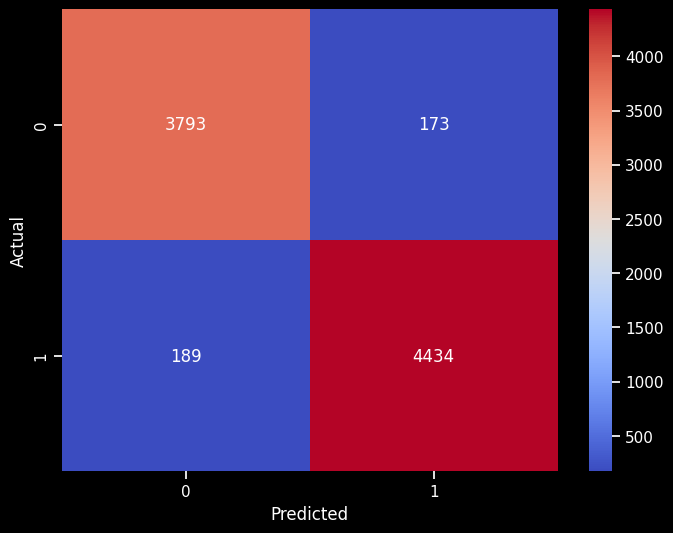

In [56]:
matrix = tf.math.confusion_matrix(y_val_en, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Evaluation on Test Data
    </h2>
</div>


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔮 Getting Predictions
    </h2>
</div>


In [57]:
test_data_1.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
id,,,,,,,,,,,,,,,,,
58645,-0.819559,0.656715,0.010345,5.0,1.698250,1.111083,1.421750,0.0,-1.285004,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
58646,-0.173814,1.384904,0.725510,2.0,0.266470,0.383191,-0.891058,1.0,-0.294012,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
58647,-0.173814,-1.179846,0.528512,4.0,-1.165170,1.404580,-0.597753,1.0,-1.285004,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
58648,1.090031,-0.053482,0.295513,0.0,-0.290834,-0.776073,-0.501713,0.0,0.617786,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58649,-0.173814,1.518583,1.046680,3.0,0.900032,1.228898,-0.406511,1.0,-0.294012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
predictions = model.predict(test_data_1)

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<div style="
    background-color: #2c3e50;
    padding: 25px;
    border-radius: 20px;
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3);
    text-align: center;
    margin: 30px auto;
    border: 2px solid #1abc9c;
    width: 90%;
    ">
    <h2 style="
        color: #ecf0f1;
        font-size: 36px;
        font-weight: 800;
        font-family: 'Arial', sans-serif;
        margin: 0;
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📄 Predictions
    </h2>
</div>


In [59]:
predictions = (predictions > 0.5).astype(int)

In [60]:
test_data_1['loan_status'] = predictions
test_data_1['loan_status'] = test_data_1['loan_status'].replace({0: 'No', 1: 'Yes'})

In [61]:
# test_data_1.reset_index()[['id', 'loan_status']].to_csv('submission.csv', index=False)